In [1]:
from Bio import Entrez, AlignIO, Phylo, SeqIO, Align
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Align import MultipleSeqAlignment
import os
import matplotlib.pyplot as plt
import random

In [2]:
gene_ids = ["NM_001113530", "NM_027627", "NM_001355055", "NM_001313744", "NM_001099328", "NM_001312908", "NM_026952", "NM_178020", "NM_001142647", "NM_017375"]

Entrez.email = "your_email@example.com" 
def fetch_seq_record(gene_id):
    handle = Entrez.efetch(db="nucleotide", id=gene_id, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()
    return record

In [3]:
seq_records = [fetch_seq_record(gene_id) for gene_id in gene_ids]

In [4]:
min_seq_length = min(map(lambda s: len(s.seq), seq_records))

In [5]:
for seq in seq_records:
    seq.seq = seq.seq[:min_seq_length]

In [6]:
alignment = MultipleSeqAlignment(seq_records)

In [7]:
calculator = DistanceCalculator('identity')
constructor = DistanceTreeConstructor(calculator)
tree = constructor.build_tree(alignment)

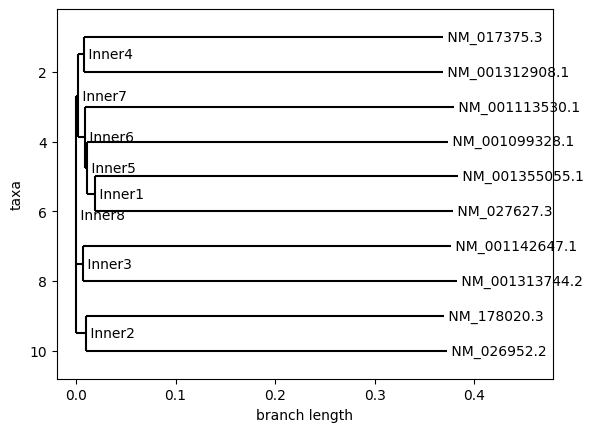

In [8]:
Phylo.draw(tree)